In [1]:
import os.path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

In [8]:
# Initialize an empty list to store DataFrames from each partition
# NOTE: This is only for partitioned data and not playDataProd.csv
dfs = []
csv_dir = '../data/playData.csv/'
# Iterate over files in the partitioned directory
for filename in os.listdir(csv_dir):
    if filename.endswith(".csv.gz"):
        file_path = os.path.join(csv_dir, filename)
        # Read each CSV file into a DataFrame
        df = pd.read_csv(file_path)
        dfs.append(df)

# Concatenate the DataFrames from all partitions
df = pd.concat(dfs, ignore_index=True)

In [2]:
# for playdataProd.csv
df = pd.read_csv('../data/playDataProd.csv')

In [3]:
print(f"Shape of the dataframe: {df.shape}")
display(df.head(10))

Shape of the dataframe: (454011, 37)


,game_id,period,eventIdx,season,game_type,start_time,end_time,away_team_id,away_team_name,home_team_id,home_team_name,event,description,shotType,strength,gameWinningGoal,emptyNet,penaltySeverity,penaltyMinutes,x_coordinate,y_coordinate,team_name,periodType,periodTime,periodTimeRemaining,is_goal,Assist_first,Assist_last,Scorer,Goalie,Shooter,home_rinkSide,away_rinkSide,rinkSide,x_goal,y_goal,shot_distance
0,2016020001,2,174,20162017,R,2016-10-12T23:00:00Z,2016-10-13T01:56:40Z,10,Toronto Maple Leafs,9,Ottawa Senators,Shot,William Nylander Wrist Shot saved by Craig And...,Wrist Shot,NaN,NaN,NaN,NaN,NaN,45.0,-22.0,Toronto Maple Leafs,REGULAR,08:39,11:21,0,NaN,NaN,NaN,Craig Anderson,William Nylander,right,left,left,89,0,49.193496
1,2016020001,2,213,20162017,R,2016-10-12T23:00:00Z,2016-10-13T01:56:40Z,10,Toronto Maple Leafs,9,Ottawa Senators,Shot,Nikita Zaitsev Wrist Shot saved by Craig Anderson,Wrist Shot,NaN,NaN,NaN,NaN,NaN,32.0,-31.0,Toronto Maple Leafs,REGULAR,15:19,04:41,0,NaN,NaN,NaN,Craig Anderson,Nikita Zaitsev,right,left,left,89,0,64.884513
2,2016020001,2,228,20162017,R,2016-10-12T23:00:00Z,2016-10-13T01:56:40Z,10,Toronto Maple Leafs,9,Ottawa Senators,Shot,James van Riemsdyk Snap Shot saved by Craig An...,Snap Shot,NaN,NaN,NaN,NaN,NaN,57.0,9.0,Toronto Maple Leafs,REGULAR,17:41,02:19,0,NaN,NaN,NaN,Craig Anderson,James van Riemsdyk,right,left,left,89,0,33.241540
3,2016020001,2,239,20162017,R,2016-10-12T23:00:00Z,2016-10-13T01:56:40Z,10,Toronto Maple Leafs,9,Ottawa Senators,Goal,"Auston Matthews (4) Wrist Shot, assists: Willi...",Wrist Shot,EVEN,False,False,NaN,NaN,81.0,4.0,Toronto Maple Leafs,REGULAR,19:57,00:03,1,William Nylander,Jake Gardiner,Auston Matthews,Craig Anderson,NaN,right,left,left,89,0,8.944272
4,2016020001,3,301,20162017,R,2016-10-12T23:00:00Z,2016-10-13T01:56:40Z,10,Toronto Maple Leafs,9,Ottawa Senators,Shot,Morgan Rielly Wrist Shot saved by Craig Anderson,Wrist Shot,NaN,NaN,NaN,NaN,NaN,-32.0,5.0,Toronto Maple Leafs,REGULAR,09:40,10:20,0,NaN,NaN,NaN,Craig Anderson,Morgan Rielly,left,right,right,-89,0,57.218878
5,2016020001,3,324,20162017,R,2016-10-12T23:00:00Z,2016-10-13T01:56:40Z,10,Toronto Maple Leafs,9,Ottawa Senators,Shot,Milan Michalek Wrist Shot saved by Craig Anderson,Wrist Shot,NaN,NaN,NaN,NaN,NaN,-49.0,11.0,Toronto Maple Leafs,REGULAR,15:43,04:17,0,NaN,NaN,NaN,Craig Anderson,Milan Michalek,left,right,right,-89,0,41.484937
6,2016020001,3,343,20162017,R,2016-10-12T23:00:00Z,2016-10-13T01:56:40Z,10,Toronto Maple Leafs,9,Ottawa Senators,Shot,Marc Methot Slap Shot saved by Frederik Andersen,Slap Shot,NaN,NaN,NaN,NaN,NaN,35.0,36.0,Ottawa Senators,REGULAR,17:59,02:01,0,NaN,NaN,NaN,Frederik Andersen,Marc Methot,left,right,left,89,0,64.899923
7,2016020002,1,37,20162017,R,2016-10-13T00:00:00Z,2016-10-13T02:41:18Z,19,St. Louis Blues,16,Chicago Blackhawks,Shot,Alex Pietrangelo Slap Shot saved by Corey Craw...,Slap Shot,NaN,NaN,NaN,NaN,NaN,74.0,-34.0,St. Louis Blues,REGULAR,05:25,14:35,0,NaN,NaN,NaN,Corey Crawford,Alex Pietrangelo,right,left,left,89,0,37.161808
8,2016020002,2,134,20162017,R,2016-10-13T00:00:00Z,2016-10-13T02:41:18Z,19,St. Louis Blues,16,Chicago Blackhawks,Shot,David Perron Slap Shot saved by Corey Crawford,Slap Shot,NaN,NaN,NaN,NaN,NaN,-49.0,-23.0,St. Louis Blues,REGULAR,04:02,15:58,0,NaN,NaN,NaN,Corey Crawford,David Perron,left,right,right,-89,0,46.141088
9,2016020002,2,209,20162017,R,2016-10-13T00:00:00Z,2016-10-13T02:41:18Z,19,St. Louis Blues,16,Chicago Blackhawks,Shot,Vladimir Tarasenko Wrist Shot saved by Corey C...,Wrist Shot,NaN,NaN,NaN,NaN,NaN,-43.0,-4.0,St. Louis Blues,REGULAR,19:20,00:40,0,NaN,NaN,NaN,Corey Crawford,Vladimir Tarasenko,left,right,right,-89,0,46.173586


In [13]:
# save head for blog post
df.head(10).to_csv('../data/head.csv', index=False)

In [4]:
# Pivot tabe shotType, event, 
df_pivot = df[df.season==20182019].pivot_table(index=['shotType'], 
                          columns='event', 
                          values='eventIdx', 
                          aggfunc='count',
                          fill_value=0)
df_pivot

event,Goal,Shot
shotType,,
Backhand,792,5929
Deflected,252,1341
Slap Shot,765,11095
Snap Shot,1191,10573
Tip-In,742,3581
Wrap-around,59,790
Wrist Shot,4147,41413


In [5]:
df_pivot['Total Shots'] = df_pivot['Goal'] + df_pivot['Shot']

# Success Ratio: probability of scoring a goal if you play that shot : P(Goal|shortType)
df_pivot['Conversion Rate'] = df_pivot['Goal'] *100/ df_pivot['Total Shots']

# Goal proportion of shot type x: P(shortType|Goal)
df_pivot['Goal proportion'] = df_pivot['Goal'] *100/ df_pivot['Goal'].sum()
#df_pivot['Shot proportion'] = df_pivot['Shot'] *100/ df_pivot['Shot'].sum()

# Shot proportion of shot type x: P(shortType|Shot)
df_pivot['Shot proportion'] = df_pivot['Total Shots'] *100/ df_pivot['Total Shots'].sum()

# Expected value of scoring a goal if you play that shot: P(Goal|shortType) * P(shortType|Goal)
df_pivot['Expected value'] = (df_pivot['Conversion Rate']/100) * (df_pivot['Shot proportion']/100) *100

df_pivot['Variance'] = df_pivot['Expected value'] * (1 - df_pivot['Conversion Rate']/100)
df_pivot['Standard Deviation'] = np.sqrt(df_pivot['Variance'])
df_pivot['Reward-to-Risk Ratio'] = df_pivot['Expected value'] / df_pivot['Standard Deviation']

# Expected value of 
df_pivot

event,Goal,Shot,Total Shots,Conversion Rate,Goal proportion,Shot proportion,Expected value,Variance,Standard Deviation,Reward-to-Risk Ratio
shotType,,,,,,,,,,
Backhand,792,5929,6721,11.783961,9.964771,8.129914,0.958026,0.845132,0.919311,1.042113
Deflected,252,1341,1593,15.819209,3.170609,1.926938,0.304826,0.256605,0.506562,0.601755
Slap Shot,765,11095,11860,6.450253,9.625063,14.346196,0.925366,0.865677,0.930418,0.994570
Snap Shot,1191,10573,11764,10.124107,14.984902,14.230071,1.440668,1.294813,1.137898,1.266078
Tip-In,742,3581,4323,17.164006,9.335682,5.229225,0.897544,0.743490,0.862259,1.040923
Wrap-around,59,790,849,6.949352,0.742325,1.026975,0.071368,0.066408,0.257698,0.276944
Wrist Shot,4147,41413,45560,9.102283,52.176648,55.110681,5.016330,4.559729,2.135352,2.349181


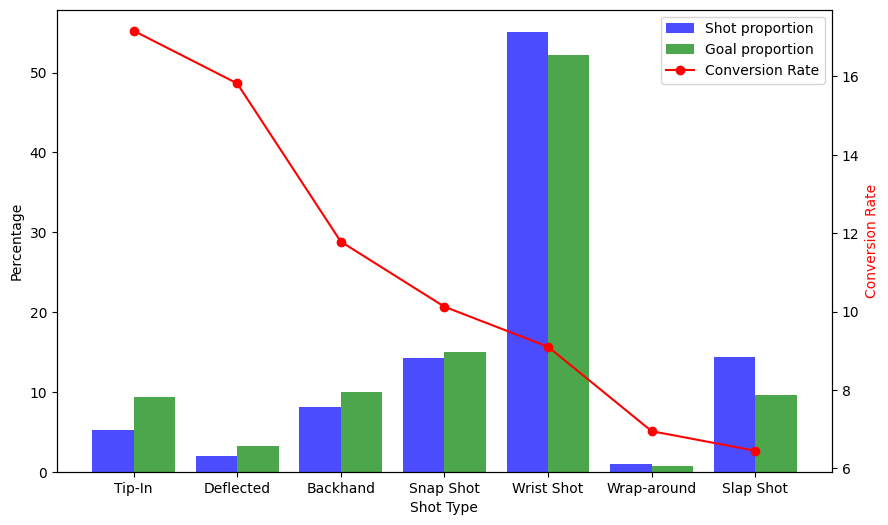

In [6]:
# Data
# sort df_pivot by Success Ratio
df_pivot = df_pivot.sort_values(by='Conversion Rate', ascending=False)

categories = df_pivot.index
bar1_data = df_pivot['Shot proportion']
bar2_data = df_pivot['Goal proportion']
line_data = df_pivot['Conversion Rate']

x = np.arange(len(categories))

# Create a figure and the first axis (for the first bar plot)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create the first bar plot on the first axis
ax1.bar(x - 0.2, bar1_data, width=0.4, color='b', alpha=0.7, label='Shot proportion')
ax1.bar(x + 0.2, bar2_data, width=0.4, color='g', alpha=0.7, label='Goal proportion')
ax1.set_xlabel('Shot Type')
ax1.set_ylabel('Percentage')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
#ax1.legend(loc='upper left')

# Create the second axis (for the line plot) sharing the same x-axis
ax2 = ax1.twinx()

# Create the line plot on the second axis
ax2.plot(x, line_data, color='r', marker='o', linestyle='-', label='Conversion Rate')
ax2.set_ylabel('Conversion Rate', color='r')

# Add a legend for the line plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Set the title and display the plot
#plt.title('Two Bar Plots and One Line Plot with Multiple Axes')
plt.xticks(rotation=90)
plt.show()


## Q2

In [7]:
df_pivot = df[df.season==20182019].pivot_table(index=['is_goal'],
                            columns='shotType', 
                            values='shot_distance', 
                            aggfunc='mean',
                            fill_value=0)
df_pivot

shotType,Backhand,Deflected,Slap Shot,Snap Shot,Tip-In,Wrap-around,Wrist Shot
is_goal,,,,,,,
0,25.592685,29.597670,52.234338,39.425522,20.258171,13.323721,41.538163
1,20.721435,20.348676,42.445229,30.342922,15.288281,10.628610,29.972700


In [8]:
# convert shot_distance to quantiles
df['shot_distance_quantiles'] = pd.qcut(df['shot_distance'], q=10, labels=False)
#df = df.sort_values(by='shot_distance', ascending=False)

def quantile_range(group):
    min_value = group['shot_distance'].min().round(2)
    max_value = group['shot_distance'].max().round(2)
    return f"{min_value} - {max_value}"

# Group by 'shot_distance_quantiles' and apply the quantile_range function
quantile_ranges = df.groupby('shot_distance_quantiles').apply(quantile_range)

# Map the quantile ranges to the original DataFrame
df['shot_distance_quantile_range'] = df['shot_distance_quantiles'].map(quantile_ranges)

def get_distance_goal_pivot(season):
    # Pivot the DataFrame to count 'eventIdx' and 'emptyNet'
    event_idx_pivot = df[df.season==season].pivot_table(index='shot_distance_quantile_range',
                                    values=['emptyNet'],
                                    aggfunc=['sum'],
                                    fill_value=0).reset_index()
    event_idx_pivot.columns = ['shot_distance_quantile_range','emptyNet']
    event_idx_pivot['shot_distance_quantile_range'] = event_idx_pivot['shot_distance_quantile_range'].astype(str)

    # Pivot the DataFrame to see 'event' values
    event_pivot = df[df.season==season].pivot_table(index='shot_distance_quantile_range',
                                columns=['event'],
                                values=['eventIdx'],
                                aggfunc=['count'],
                                fill_value=0).reset_index()
    event_pivot.columns = ['shot_distance_quantile_range','Goal','Shot']
    event_pivot['shot_distance_quantile_range'] = event_pivot['shot_distance_quantile_range'].astype(str)
    # Add a 'Total' column to the event pivot table
    #event_pivot['Total'] = event_pivot.sum(axis=1)

    # Reset the index of both pivot tables
    #event_idx_pivot.reset_index(inplace=True)
    #event_pivot.reset_index(inplace=True)

    # Merge the two pivot tables based on the 'shot_distance_quantile_range' index
    combined_pivot = event_idx_pivot.merge(event_pivot, on='shot_distance_quantile_range')
    return combined_pivot
                                            

In [9]:
seasons = [20182019,20192020,20202021]
season_map = {}
for season in seasons:
    season_map[season] = get_distance_goal_pivot(season)
    season_map[season]['Conversion Rate'] = season_map[season]['Goal'] *100/ (season_map[season]['Shot']+season_map[season]['Goal'])


/var/folders/_l/6j3dwytd7v5bg6vcjz3fhxgw0000gn/T/ipykernel_49841/2279369438.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(season_map[seasons[0]]['shot_distance_quantile_range'], rotation=45)


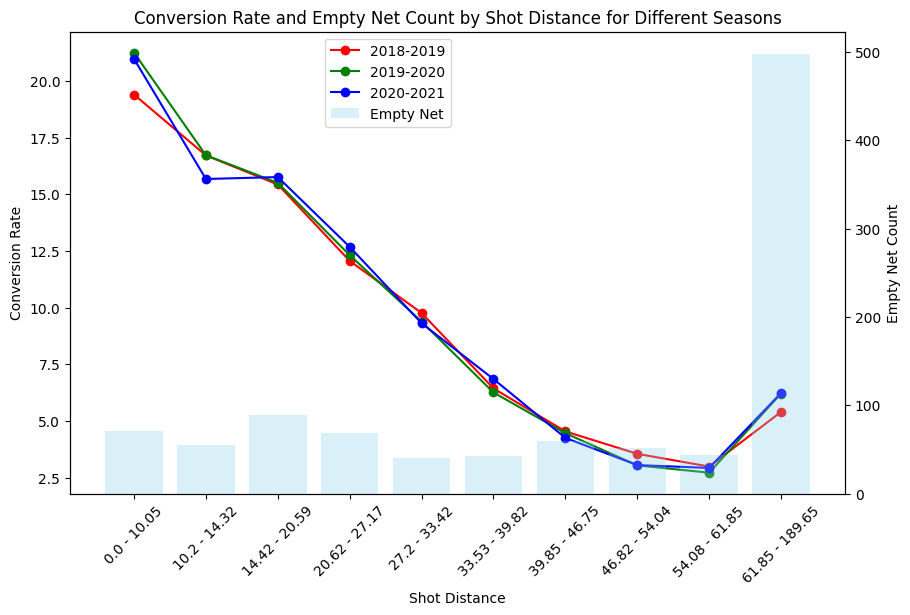

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

# Create line plots
ax.plot(season_map[seasons[0]]['shot_distance_quantile_range'], 
        season_map[seasons[0]]['Conversion Rate'], color='r', marker='o', linestyle='-', label='2018-2019')
ax.plot(season_map[seasons[1]]['shot_distance_quantile_range'], 
        season_map[seasons[1]]['Conversion Rate'], color='g', marker='o', linestyle='-', label='2019-2020')
ax.plot(season_map[seasons[2]]['shot_distance_quantile_range'], 
        season_map[seasons[2]]['Conversion Rate'], color='b', marker='o', linestyle='-', label='2020-2021')

# Set y-axis label for the first axis
ax.set_ylabel('Conversion Rate')
ax.set_xlabel('Shot Distance')

# Create the second axis for the bar plot (sharing the same x-axis)
ax2 = ax.twinx()

# Calculate the sum of 'emptyNet' for all seasons
bar1_data = (season_map[seasons[0]]['emptyNet'] +
             season_map[seasons[1]]['emptyNet'] +
             season_map[seasons[2]]['emptyNet'])

# Create the bar plot
ax2.bar(season_map[seasons[0]]['shot_distance_quantile_range'], bar1_data, color='skyblue', alpha=0.3, label='Empty Net')

# Set y-axis label for the second axis
ax2.set_ylabel('Empty Net Count')

# Add a legend for both axes
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper right',bbox_to_anchor=(0.5, 1))

# Set the title and display the plot
ax.set_xticklabels(season_map[seasons[0]]['shot_distance_quantile_range'], rotation=45)
plt.title('Conversion Rate and Empty Net Count by Shot Distance for Different Seasons')
plt.show()


### Q3

Combine the information from the previous sections to produce a figure that shows the goal percentage (# goals / # shots) as a function of both distance from the net, and the category of shot types (you can pick a single season of your choice). Briefly discuss your findings; e.g. what might be the most dangerous types of shots?

In [11]:
compare_perc_dist_type = df[df.season==20192020].pivot_table(index=['shot_distance_quantile_range','shotType'],
                                columns=['event'],
                                values=['eventIdx'],
                                aggfunc=['count'],
                                fill_value=0).reset_index()
compare_perc_dist_type.columns = ['shot_distance_quantile_range','shotType','Goal','Shot']
compare_perc_dist_type['Conversion Rate'] = compare_perc_dist_type['Goal'] *100/ (compare_perc_dist_type['Shot']+compare_perc_dist_type['Goal'])

In [14]:
compare_perc_dist_type.to_csv('../data/compare_perc_dist_type.csv', index=False)

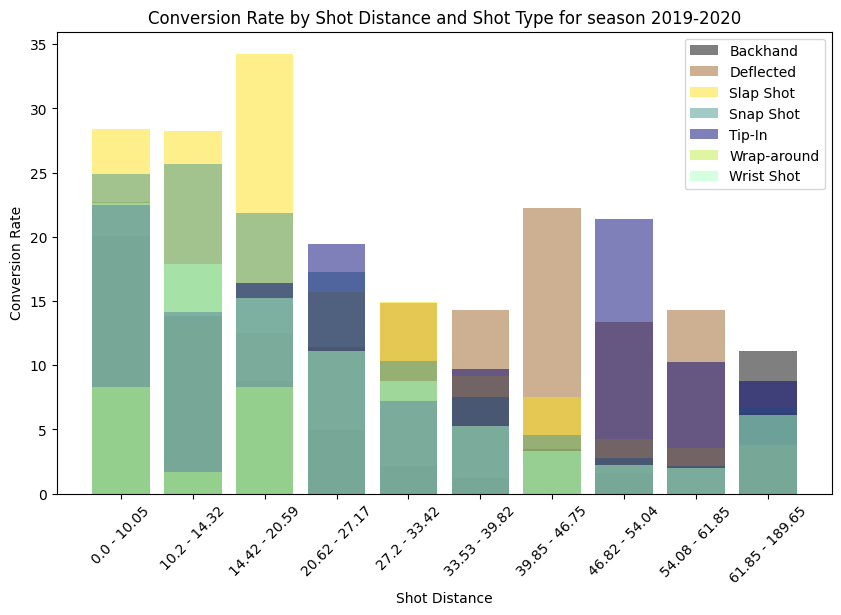

In [12]:
# Get unique shot types
shot_types = compare_perc_dist_type['shotType'].unique()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
# Define custom colors for each shot type
custom_colors = ['#000000', '#9A6324', '#ffe119', '#469990', '#000075', '#bfef45', '#aaffc3']

# Plot bars for each shot type
for i,shot_type in enumerate(shot_types):
    shot_type_data = compare_perc_dist_type[compare_perc_dist_type['shotType'] == shot_type]
    x_values = shot_type_data['shot_distance_quantile_range']
    y_values = shot_type_data['Conversion Rate']
    ax.bar(x_values, y_values, label=shot_type, color = [custom_colors[i]],alpha=0.5)

# Set labels and title
ax.set_xlabel('Shot Distance')
ax.set_ylabel('Conversion Rate')
plt.xticks(rotation=45)
ax.set_title('Conversion Rate by Shot Distance and Shot Type for season 2019-2020')

# Add a legend
ax.legend()

# Show the plot
plt.show()

### (Misc) Conversion rate by team for seasons 2018-2019, 2019-2020, 2020-2021

In [23]:
CR_by_team = df[df.season.isin([20182019,20192020,20202021])].pivot_table(index=['team_name'],
                                columns=['event'],
                                values=['eventIdx'],
                                aggfunc=['count'],
                                fill_value=0).reset_index()
CR_by_team.columns = ['team_name','Goal','Shot']
CR_by_team['Conversion Rate'] = CR_by_team['Goal'] *100/ (CR_by_team['Shot']+CR_by_team['Goal'])

CR_by_team['Total Shots'] = CR_by_team['Goal'] + CR_by_team['Shot']

# Success Ratio: probability of scoring a goal if you play that shot : P(Goal|shortType)
CR_by_team['Conversion Rate'] = CR_by_team['Goal'] *100/ CR_by_team['Total Shots']

# Goal proportion of shot type x: P(shortType|Goal)
CR_by_team['Goal proportion'] = CR_by_team['Goal'] *100/ CR_by_team['Goal'].sum()
#df_pivot['Shot proportion'] = df_pivot['Shot'] *100/ df_pivot['Shot'].sum()

# Shot proportion of shot type x: P(shortType|Shot)
CR_by_team['Shot proportion'] = CR_by_team['Total Shots'] *100/ CR_by_team['Total Shots'].sum()

# Expected value of scoring a goal if you play that shot: P(Goal|shortType) * P(shortType|Goal)
CR_by_team['Expected value'] = (CR_by_team['Conversion Rate']/100) * (CR_by_team['Shot proportion']/100) *100

CR_by_team['Variance'] = CR_by_team['Expected value'] * (1 - CR_by_team['Conversion Rate']/100)
CR_by_team['Standard Deviation'] = np.sqrt(CR_by_team['Variance'])
CR_by_team['Reward-to-Risk Ratio'] = CR_by_team['Expected value'] / CR_by_team['Standard Deviation']

In [24]:
CR_by_team

,team_name,Goal,Shot,Conversion Rate,Total Shots,Goal proportion,Shot proportion,Expected value,Variance,Standard Deviation,Reward-to-Risk Ratio
0,Anaheim Ducks,522,5404,8.808640,5926,2.582624,2.839945,0.250161,0.228125,0.477624,0.523760
1,Arizona Coyotes,578,5755,9.126796,6333,2.859687,3.034994,0.276998,0.251717,0.501714,0.552103
2,Boston Bruins,779,7369,9.560628,8148,3.854146,3.904805,0.373324,0.337632,0.581061,0.642487
3,Buffalo Sabres,568,5796,8.925204,6364,2.810212,3.049850,0.272205,0.247910,0.497906,0.546700
4,Calgary Flames,663,5934,10.050023,6597,3.280230,3.161512,0.317733,0.285800,0.534603,0.594334
5,Carolina Hurricanes,737,7177,9.312611,7914,3.646349,3.792664,0.353196,0.320304,0.565954,0.624072
6,Chicago Blackhawks,654,5917,9.952823,6571,3.235702,3.149052,0.313420,0.282225,0.531249,0.589967
7,Colorado Avalanche,695,6163,10.134150,6858,3.438551,3.286592,0.333068,0.299315,0.547096,0.608792
8,Columbus Blue Jackets,627,6391,8.934169,7018,3.102118,3.363270,0.300480,0.273635,0.523101,0.574421
9,Dallas Stars,559,5827,8.753523,6386,2.765684,3.060393,0.267892,0.244442,0.494411,0.541841


In [25]:
CR_by_team['Reward-to-Risk Ratio'].describe()

count    31.000000
mean      0.587228
std       0.037390
min       0.516132
25%       0.566086
50%       0.588568
75%       0.609406
max       0.682870
Name: Reward-to-Risk Ratio, dtype: float64